In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
data = pd.read_csv("pollution_us_2000_2016.csv/pollution_california_2000_2016.csv")

In [2]:
data = data.dropna(axis='rows')  # Delete rows with NAs
data['Date Local'] = pd.to_datetime(data['Date Local'],format='%m/%d/%Y')  # Change date from string to date value
data = data.groupby(['County','Date Local'], as_index=False).mean()  # Take mean values if there are depulicated entries
data.head()

,County,Date Local,id,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Alameda,2001-12-05,3631.0,6.0,1.0,10.0,32.608696,38.0,15.0,36.0,...,22.0,6.0,1.333333,3.0,11.0,4.0,1.066667,1.2,18.0,14.0
1,Alameda,2001-12-06,3635.0,6.0,1.0,10.0,30.625000,62.0,23.0,60.0,...,0.0,6.0,2.416667,8.0,16.0,11.0,0.266667,0.8,0.0,9.0
2,Alameda,2001-12-07,3639.0,6.0,1.0,10.0,20.416667,32.0,22.0,30.0,...,11.0,18.0,1.625000,5.0,10.0,7.0,0.575000,1.2,8.0,14.0
3,Alameda,2001-12-08,3643.0,6.0,1.0,10.0,27.125000,33.0,16.0,31.0,...,23.0,29.0,1.916667,4.0,4.0,6.0,1.145833,1.9,10.0,22.0
4,Alameda,2001-12-09,3647.0,6.0,1.0,10.0,16.625000,36.0,17.0,34.0,...,0.0,28.0,2.041667,4.0,7.0,6.0,0.479167,1.8,22.0,20.0


Locator attempting to generate 6563 ticks ([-299.0, ..., 6263.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6563 ticks ([-299.0, ..., 6263.0]), which exceeds Locator.MAXTICKS (1000).


<Figure size 1152x504 with 0 Axes>

Locator attempting to generate 6563 ticks ([-299.0, ..., 6263.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6563 ticks ([-299.0, ..., 6263.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6563 ticks ([-299.0, ..., 6263.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6563 ticks ([-299.0, ..., 6263.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6563 ticks ([-299.0, ..., 6263.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6563 ticks ([-299.0, ..., 6263.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6563 ticks ([-299.0, ..., 6263.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6563 ticks ([-299.0, ..., 6263.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6563 ticks ([-299.0, ..., 6263.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6563 ticks ([-2

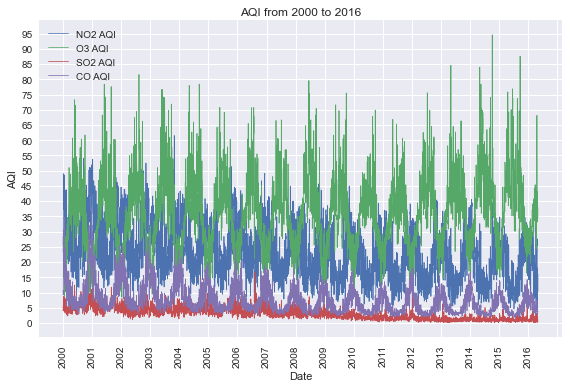

In [3]:
timeSeries = data[['Date Local', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']]
#timeSeries = timeSeries.groupby(['Date Local'], as_index = False).mean()
#timeSeries = timeSeries.groupby(['Date Local'], as_index = False)

plt.style.use('seaborn')

plt.figure(figsize = (16, 7))
#timeSeries.groupby([timeSeries['Date Local'].dt.year, timeSeries['Date Local'].dt.month]).mean().plot()
timeSeries.groupby([timeSeries['Date Local'].dt.year, timeSeries['Date Local'].dt.month, timeSeries['Date Local'].dt.day]).mean().plot(lw=0.75)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(365))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))

plt.gca().xaxis.set_major_formatter(ticker.FixedFormatter(np.arange(1999,2017)))
plt.xticks(rotation=90)


plt.title("AQI from 2000 to 2016")
plt.xlabel("Date")
plt.ylabel("AQI")

plt.legend(loc = 'upper left')
plt.tight_layout()

In [4]:
AQIData = timeSeries.groupby('Date Local').mean()
AQIData.index = pd.to_datetime(AQIData.index)
AQIData.head()

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
Date Local,,,,
2000-01-01,23.284722,25.638889,5.611111,10.763889
2000-01-02,24.969697,28.492424,3.984848,9.204545
2000-01-03,37.631944,17.777778,5.965278,19.819444
2000-01-04,42.888889,14.881944,7.013889,23.243056
2000-01-05,41.743056,22.215278,7.090278,23.013889


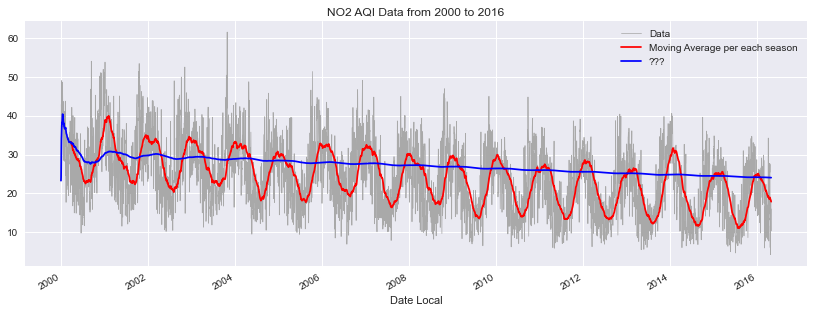

In [5]:
#Moving Averages
plt.figure(figsize=(14,5))
plt.plot(AQIData.index, AQIData['NO2 AQI'], lw=0.75, color = 'darkgray', label='Data')
AQIData.rolling(window = 28*3).mean()['NO2 AQI'].plot(color = 'red', label='Moving Average per each season')
AQIData.expanding().mean()['NO2 AQI'].plot(color = 'blue', label='???')
plt.legend()
plt.title('NO2 AQI Data from 2000 to 2016');

We split the data from 2000 to 2015 to the train data and from 2015 to 2016 to the test data.
<br>We already know the AQI values for the test data. However, we are going to predict that data using different models and compare it with the actual AQI values.
<br>Train data consists of roughly %92 of the data and test data is roughly %8 of the data.

In [24]:
train = AQIData['2005-01-01':'2015-01-01']
test = AQIData['2015-01-01':'2016-03-31']
print("Percentage of train data compare to the whole data: ", len(train)/len(AQIData)*100)
print("Percentage of test data compare to the whole data: ", len(test)/len(AQIData)*100)

Percentage of train data compare to the whole data:  61.24056999161777
Percentage of test data compare to the whole data:  7.644593461860855


Below the train and test data is depicted. 
<br>From now on, we are going to show train data in gray, actual test data in blue and the predicted data in red.

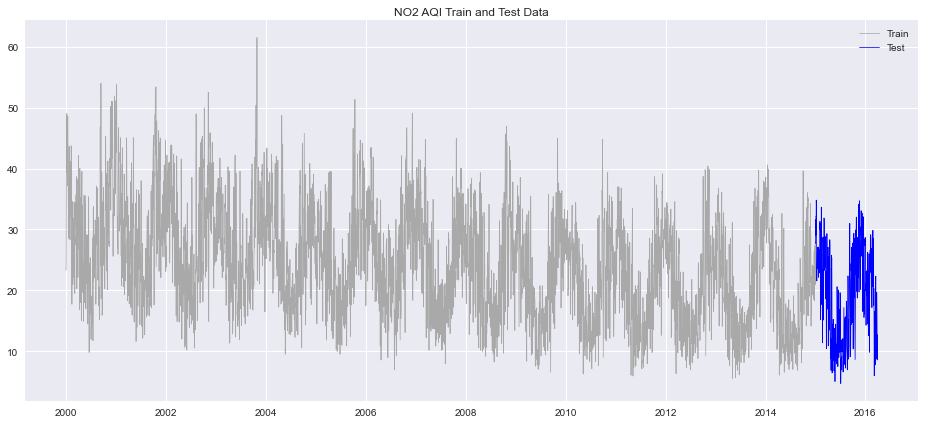

In [7]:
plt.figure(figsize=(16,7))
plt.plot(train.index, train['NO2 AQI'], lw=0.75, color = 'darkgray', label='Train')
plt.plot(test.index, test['NO2 AQI'], lw=0.75, color='blue', label='Test')
plt.legend()
plt.title('NO2 AQI Train and Test Data');

The plotData function depicts the train, test and (sometimes) predicted values of the four major pollutants.
<br>For the train data, we only show the data from year 2013 (although we use all the train data in our calculations)

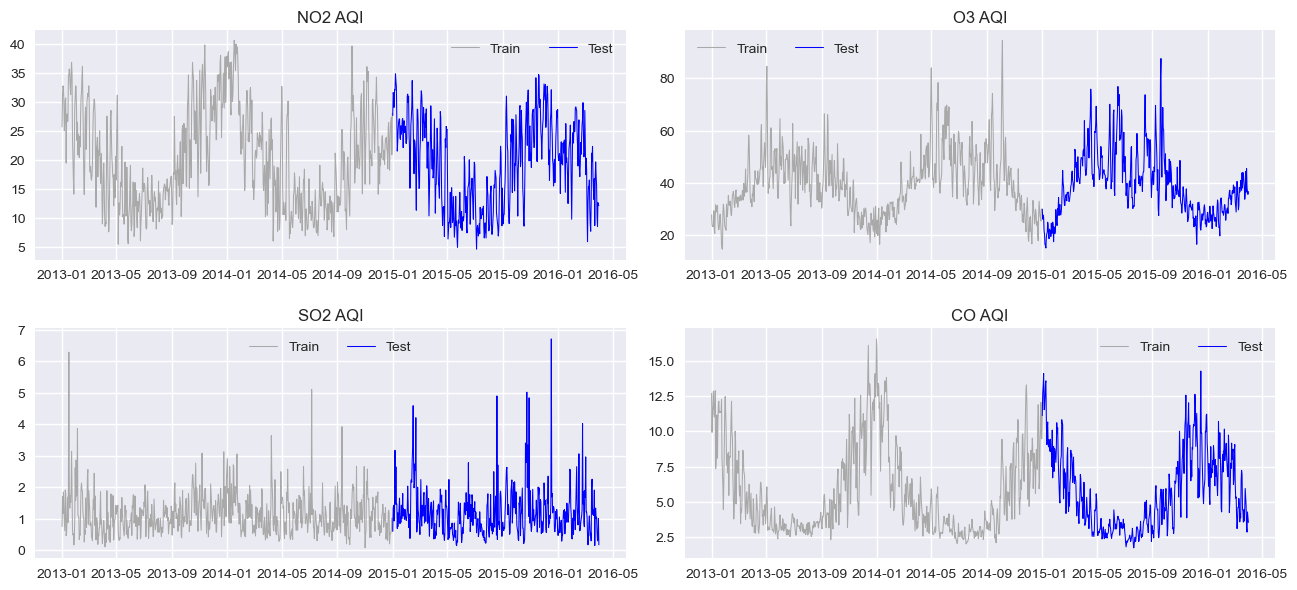

In [8]:
pollutants = ['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']

def plotData():
    fig, axes = plt.subplots(2, 2, figsize=(16,7), dpi=100)
    fig.subplots_adjust(wspace=0.1, hspace=0.3)
    axlist = [(0, 0), (0, 1), (1, 0), (1, 1)]

    for (i, j), pol in zip(axlist, pollutants):
        axes[i][j].plot(train.loc['2013':, pol], lw = 0.75, color = 'darkgray', label = 'Train')
        axes[i][j].plot(test[pol], lw = 0.75, color = 'blue', label = 'Test', )
        #axes[i][j].plot(predictions[pol], c = 'red', lw = 2, ls = '--', label = 'Forecast')
        axes[i][j].set_title(pol)
        axes[i][j].legend(ncol=3)
    #axes[0][0].legend(bbox_to_anchor=[1.35, 1.15], ncol=3)
plotData()

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

pollutants = ['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']
mindex = pd.MultiIndex.from_product(iterables=(['MSE', 'MAE'], ['AR', 'ARMA',]))
error = pd.DataFrame(index=mindex)
NONAN_predict = pd.DataFrame()
NONAN_test = pd.DataFrame()

def errorCalculation(method, predict):
    for pol in pollutants:
        index = []
        index = predict[pol].index[predict[pol].apply(np.isnan)]
        NONAN_predict[pol] = predict[pol].drop(index)
        NONAN_test[pol] = test[pol].drop(index)
        MAE = mean_absolute_error(NONAN_test[pol], NONAN_predict[pol])
        MSE = mean_squared_error(NONAN_test[pol], NONAN_predict[pol])
        error.loc[('MAE', method), pol] = MAE
        error.loc[('MSE', method), pol] = np.sqrt(MSE)

In [10]:
def plotData(predict):
    fig, axes = plt.subplots(2, 2, figsize=(16,7), dpi=100)
    fig.subplots_adjust(wspace=0.1, hspace=0.3)
    axlist = [(0, 0), (0, 1), (1, 0), (1, 1)]

    for (i, j), pol in zip(axlist, pollutants):
        axes[i][j].plot(train[train.index>='2013'].index, train.loc['2013':, pol], lw = 0.75, color = 'darkgray', label = 'Train')
        axes[i][j].plot(test.index, test[pol], lw = 0.75, color = 'blue', label = 'Test', )
        axes[i][j].plot(test.index, predict[pol], c = 'red', lw = 0.75, label = 'Forecast')
        axes[i][j].set_title(pol)
        axes[i][j].legend(ncol=3)

In [25]:
# AR
from statsmodels.tsa.ar_model import AutoReg
ARpredict = pd.DataFrame()
# fit model
# NO2_AQI_model = AutoReg(train["NO2 AQI"], lags=[1, 30]).fit()
# O3_AQI_model = AutoReg(train["O3 AQI"], lags=[1, 30]).fit()
# SO2_AQI_model = AutoReg(train["SO2 AQI"], lags=[1, 30]).fit()
# CO_AQI_model = AutoReg(train["CO AQI"], lags=[1, 30]).fit()

NO2_AQI_model = AutoReg(train["NO2 AQI"], lags=1).fit()
O3_AQI_model = AutoReg(train["O3 AQI"], lags=1).fit()
SO2_AQI_model = AutoReg(train["SO2 AQI"], lags=1).fit()
CO_AQI_model = AutoReg(train["CO AQI"], lags=1).fit()

# make prediction
ARpredict["NO2 AQI"] = NO2_AQI_model.predict(end=test.shape[0]-1)
ARpredict["O3 AQI"] = O3_AQI_model.predict(end=test.shape[0]-1)
ARpredict["SO2 AQI"] = SO2_AQI_model.predict(end=test.shape[0]-1)
ARpredict["CO AQI"] = CO_AQI_model.predict(end=test.shape[0]-1)

ARpredict.index = test.index
errorCalculation('AR', ARpredict)

#print(NO2_AQI_model.summary())

C:\Users\viole\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\viole\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\viole\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\viole\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


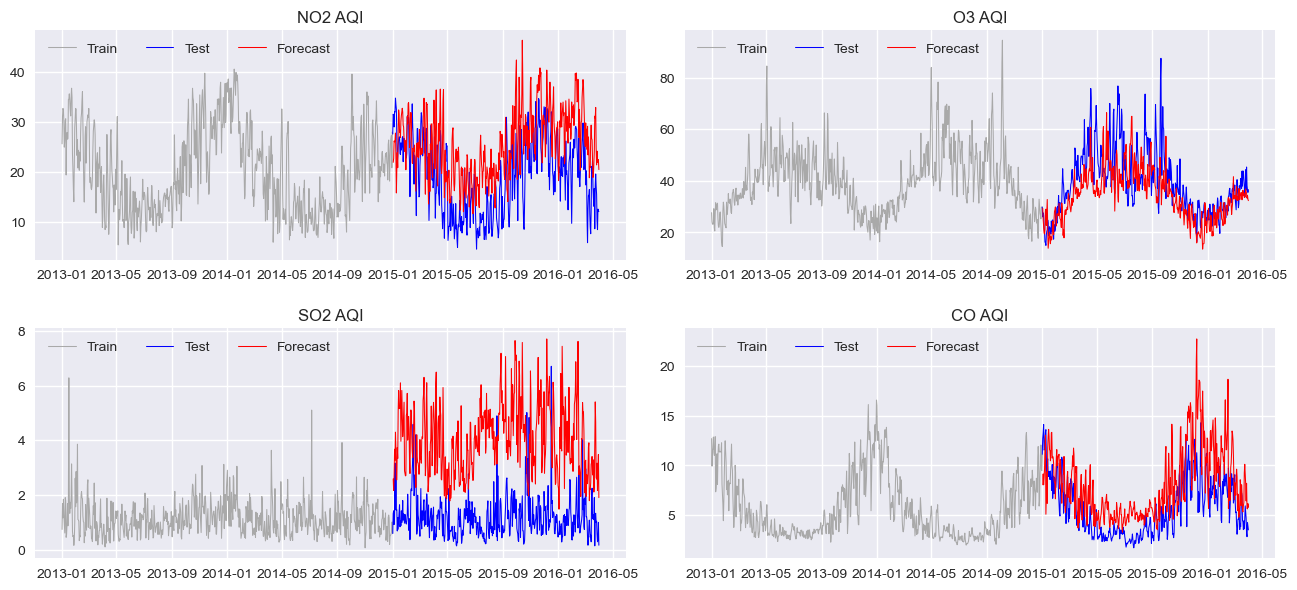

In [26]:
plotData(ARpredict)

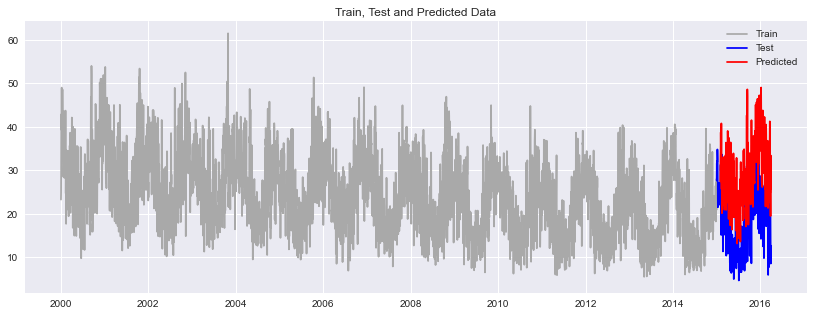

In [13]:
#???????????????????????????????????????????????????????
plt.figure(figsize=(14,5))
plt.plot(train.index, train['NO2 AQI'], color = 'darkgray', label='Train')
plt.plot(test.index, test['NO2 AQI'], color='blue', label='Test')
plt.plot(test.index, ARpredict["NO2 AQI"], color='red', label='Predicted')
plt.legend()
plt.title('Train, Test and Predicted Data');

In [14]:
# ARMA
from statsmodels.tsa.arima_model import ARMA
ARMApredict = pd.DataFrame()
# fit model
NO2_AQI_model = ARMA(train["NO2 AQI"], order=(2, 1)).fit(disp=False)
O3_AQI_model = ARMA(train["O3 AQI"], order=(2, 1)).fit(disp=False)
SO2_AQI_model = ARMA(train["SO2 AQI"], order=(2, 1)).fit(disp=False)
CO_AQI_model = ARMA(train["CO AQI"], order=(2, 1)).fit(disp=False)

# make prediction
ARMApredict["NO2 AQI"] = NO2_AQI_model.predict(end=test.shape[0]-1)
ARMApredict["O3 AQI"] = O3_AQI_model.predict(end=test.shape[0]-1)
ARMApredict["SO2 AQI"] = SO2_AQI_model.predict(end=test.shape[0]-1)
ARMApredict["CO AQI"] = CO_AQI_model.predict(end=test.shape[0]-1)

ARMApredict.index = test.index
errorCalculation('ARMA', ARMApredict)

print(NO2_AQI_model.summary())

C:\Users\viole\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\viole\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\viole\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\viole\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:                NO2 AQI   No. Observations:                 5480
Model:                     ARMA(2, 1)   Log Likelihood              -16339.281
Method:                       css-mle   S.D. of innovations              4.771
Date:                Thu, 03 Dec 2020   AIC                          32688.562
Time:                        23:14:44   BIC                          32721.606
Sample:                    01-01-2000   HQIC                         32700.090
                         - 01-01-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            24.5029      0.343     71.461      0.000      23.831      25.175
ar.L1.NO2 AQI     0.4677      0.045     10.288      0.000       0.379       0.557
ar.L2.NO2 AQI     0.2419      0.040     

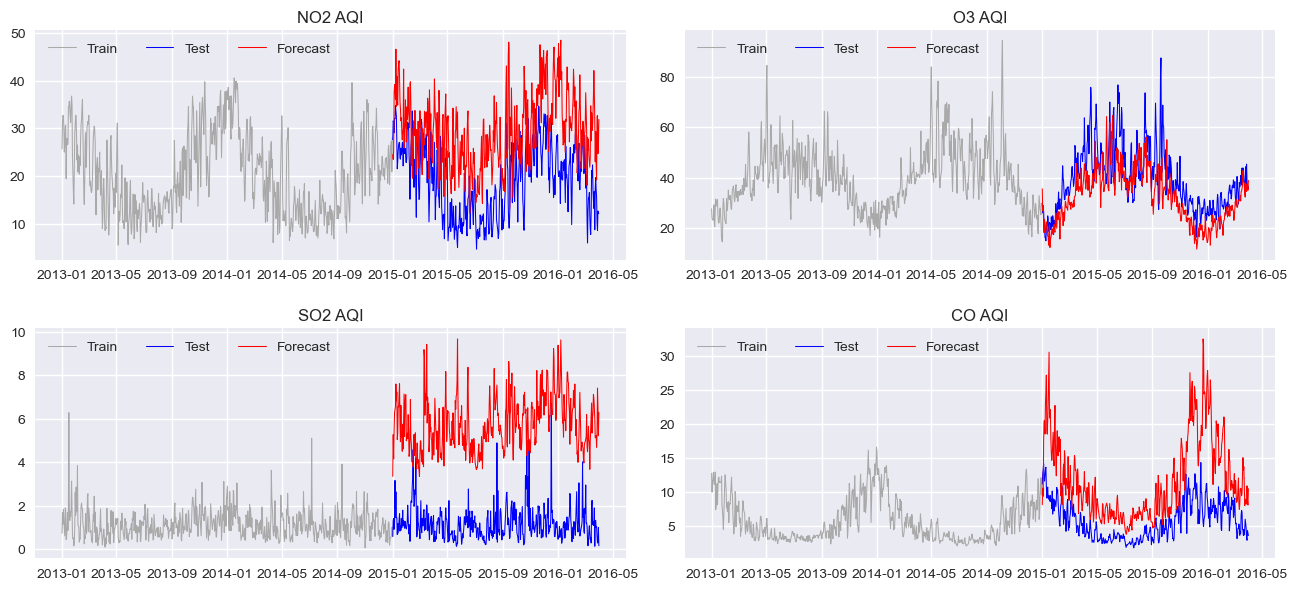

In [15]:
plotData(ARMApredict)

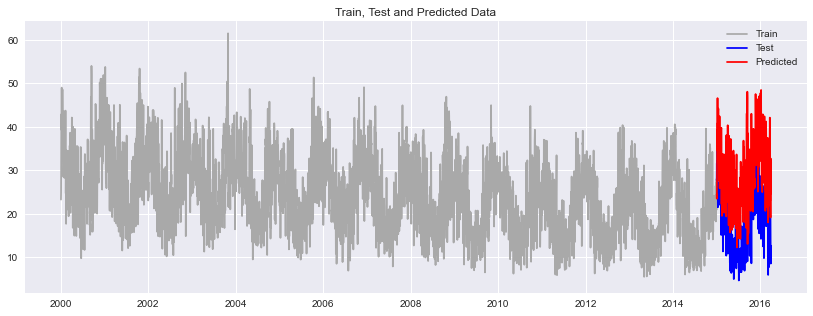

In [16]:
plt.figure(figsize=(14,5))
plt.plot(train.index, train['NO2 AQI'], color = 'darkgray', label='Train')
plt.plot(test.index, test['NO2 AQI'], color='blue', label='Test')
plt.plot(test.index, ARMApredict["NO2 AQI"], color='red', label='Predicted')
plt.legend()
plt.title('Train, Test and Predicted Data');

In [17]:
error

NO2 AQI     O3 AQI   SO2 AQI    CO AQI
MSE AR    13.323095  11.784036  4.638234  7.144074
    ARMA  13.344612  11.633731  4.799865  7.195970
MAE AR    11.311548   8.937325  4.329606  5.652670
    ARMA  11.262308   9.034602  4.568156  5.797593

In [20]:
error

NO2 AQI     O3 AQI   SO2 AQI    CO AQI
MSE AR    13.825063  11.790386  4.770496  7.154540
    ARMA  13.344612  11.633731  4.799865  7.195970
MAE AR    11.898850   9.108603  4.513968  5.758541
    ARMA  11.262308   9.034602  4.568156  5.797593

In [23]:
error

NO2 AQI     O3 AQI   SO2 AQI    CO AQI
MSE AR    13.265174  11.841809  4.564988  7.068937
    ARMA  13.344612  11.633731  4.799865  7.195970
MAE AR    11.242385   8.907455  4.202762  5.551061
    ARMA  11.262308   9.034602  4.568156  5.797593

In [27]:
error

NO2 AQI     O3 AQI   SO2 AQI    CO AQI
MSE AR     9.647363  11.507811  3.197128  3.648732
    ARMA  13.344612  11.633731  4.799865  7.195970
MAE AR     8.087311   8.566897  2.896929  2.828698
    ARMA  11.262308   9.034602  4.568156  5.797593